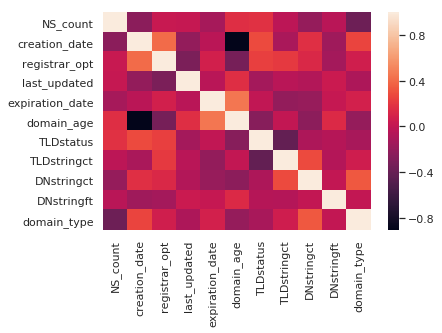

In [36]:
#################################
#chi-square test of independence#
#################################

# -*- coding: utf-8 -*-
"""
Created on Wed Aug 06 07:00:00 2019

@author: Geoffrey Duncan Opiyo

# As seen by Chi test, there's strong correlation between any two variables
#The only weak correlation is between domain_age and creation_date
#Meaning, there is strong evidence of data redundancy, therefore, Dimensionality Reduction is required.

"""

# Importing the libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Importing the dataset
dataset_RF = pd.read_csv('machine_learning_data_test_200.csv')
sns.heatmap(dataset_RF.corr())
plt.show()



original shape (rows, columns):    (274, 10)
transformed shape (rows, columns): (274, 10)



PCA Components
***************

[[ 5.96568244e-07 -2.23781018e-01 -6.26958297e-07  9.46583720e-01
   8.23930421e-03  2.32020323e-01 -2.54616654e-07 -7.88020577e-08
  -3.58824757e-06  2.17784552e-07]
 [-2.09828938e-06  6.08256105e-01  5.19123468e-07  3.20685297e-01
  -1.09512919e-01 -7.17769024e-01  3.96162735e-07 -2.80458580e-07
   7.50232124e-06 -4.69741868e-07]
 [-5.51143417e-06  4.96601685e-01  1.00417357e-06  3.37668595e-02
   8.09077067e-01  3.12475383e-01  3.83563564e-07 -2.91522912e-06
  -1.37848713e-05 -2.36283676e-07]
 [-5.59724161e-02  1.35115353e-06  3.88188177e-03  1.44599793e-06
   1.17671574e-05  1.05722733e-05 -6.92220278e-03  3.35466494e-02
   9.97829657e-01  3.83404582e-03]
 [ 9.96569280e-01  3.97040378e-06  3.30098145e-02  3.90552489e-07
   4.97991327e-06  5.26658276e-07  4.10791711e-02 -1.34495837e-02
   5.66111417e-02 -2.62070902e-02]
 [ 1.23378478e-02  2.41227979e-06  1.4

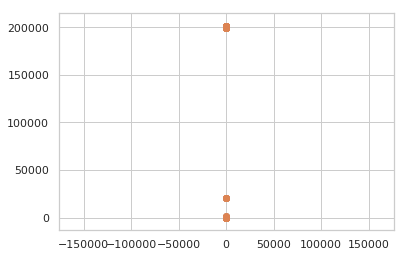

In [17]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 07 08:55:00 2019

@author: Geoffrey Duncan Opiyo

AIM: To study and see the cumulative variance explained by all the principal compmnents (variables)
so that we apply DIMENSIONALITY REDUCTION to select the most statistically significant matrix of feautres X
to participate in the model.
"""

# Importing the libraries
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Importing the dataset
dataset_RF = pd.read_csv('machine_learning_data_test_200.csv')
X = dataset_RF.iloc[:, 0:10].values
y = dataset_RF.iloc[:, 10].values

#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= None)
pca.fit(X)
X_pca = pca.transform(X)
print('\n')
print("original shape (rows, columns):   ", X.shape)
print("transformed shape (rows, columns):", X_pca.shape)
print('\n')

#Evaluation
print('\nPCA Components')
print('***************\n')
print(pca.components_)

print('\nPCA Variance')
print('***************\n')
print(pca.explained_variance_)
print('\n')

print('Explained Variance Ratio')
print('************************\n')
print(pca.explained_variance_ratio_)
print('\n')

print(dataset_RF.head(5))


#Visualizing inverse transformation
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');



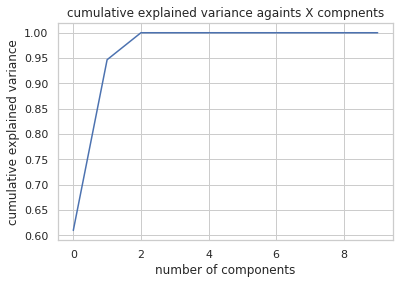

In [37]:
# Visualizing Cumulative variance ratio.
# and as seen, only two components are the most statistically
# significant matrix of feautres X attributing to over 51%

plt.title('cumulative explained variance againts X compnents')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [38]:
print(list(dataset_RF.columns))

['NS_count', 'creation_date', 'registrar_opt', 'last_updated', 'expiration_date', 'domain_age', 'TLDstatus', 'TLDstringct', 'DNstringct', 'DNstringft', 'domain_type']


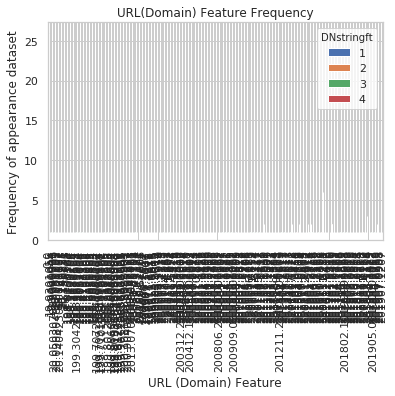

In [42]:
%matplotlib inline
pd.crosstab(dataset_RF.creation_date,dataset_RF.DNstringft).plot(kind='bar')
plt.title('URL(Domain) Feature Frequency')
plt.xlabel('URL (Domain) Feature')
plt.ylabel('Frequency of appearance dataset')
plt.savefig('URL Features')

In [9]:
dataset_RF.head(10)

,NS_count,creation_date,registrar_opt,last_updated,expiration_date,domain_age,TLDstatus,TLDstringct,DNstringct,DNstringft,domain_type
0,3,201611.1214,1,0.0000,0.0,-201611.1214,1,3,15,3,1
1,2,201905.0610,1,0.0000,0.0,-201905.0610,1,3,13,2,1
2,2,201602.2814,1,0.0000,0.0,-201602.2814,1,3,15,2,1
3,2,201706.1519,1,0.0000,0.0,-201706.1519,1,3,13,1,1
4,3,201611.1214,1,0.0000,0.0,-201611.1214,1,3,15,3,1
5,3,201611.1214,1,0.0000,0.0,-201611.1214,1,3,15,3,1
6,2,201903.1106,1,0.0000,0.0,-201903.1106,1,3,38,2,1
7,2,201903.1106,1,0.0000,0.0,-201903.1106,1,3,38,2,1
8,2,201903.1106,1,0.0000,0.0,-201903.1106,1,3,38,2,1
9,3,0.0000,0,201603.0122,0.0,0.0000,1,2,8,2,1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


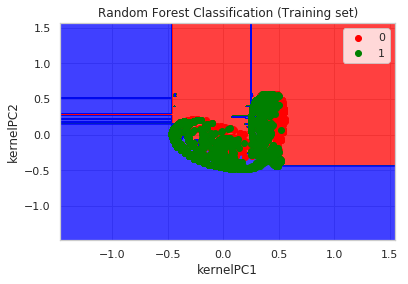

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 432x288 with 0 Axes>

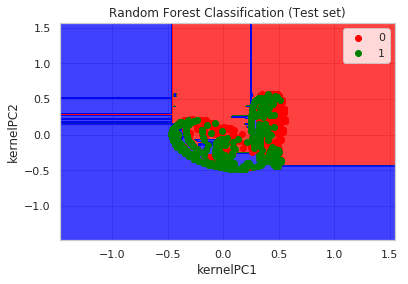

f1=0.682 auc=0.758 ap=0.758


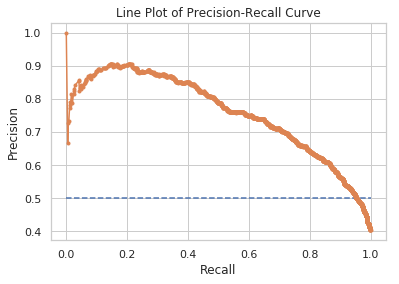

In [43]:
# Random Forest Classification

# -*- coding: utf-8 -*-
"""
Created on Wed Aug 07 09:30:00 2019

@author: Geoffrey Duncan Opiyo
"""

# Importing the libraries
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.feature_selection import SelectFromModel
from scipy.io import arff

# Importing the dataset
dataset_RF = pd.read_csv('SAMPLE_machine_learning_data.csv')
X = dataset_RF.iloc[:, 0:10].values
y = dataset_RF.iloc[:, 10].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

'''
DIMENSIONALITY REDUCTION:

PCA
****
For this dataset, we need to perform dimensionality reduction to reduce the number of features from 9 to 2 as strongly supported 
by the cumulative explained variance ratio. These 2 new features give the directions in which there is maximal variance.
That will explain the data with most variance amounting to statistically significant variables/data points.
'''
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 2)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
#explained_variance = pca.explained_variance_ratio_

# Applying Kernel PCA (Unsupervised Learning)

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

# Features for feature importances
features = list(X_train)



# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 42, min_samples_leaf = 1, 
                                    max_depth = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10, 200, 250, 500]}, 
              {'max_features': ['auto', 'sqrt', 'log2']},
              {'max_depth' : [4,5,6,7,8,10,20]},
              {'criterion' :['gini', 'entropy']},
              {'min_samples_leaf': [1,2,8,10]},
              {'random_state': [0, 42]},
              {'min_samples_split': [2, 5, 10]}
             ]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_



######################################
#Visualising the Training set results#
######################################
plt.figure(1)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('kernelPC1')
plt.ylabel('kernelPC2')
plt.legend()
plt.show()
plt.savefig('RF_1.png')



###################################
# Visualising the Test set results#
###################################

plt.figure(2)
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('kernelPC1')
plt.ylabel('kernelPC2')
plt.legend()
plt.show()
plt.savefig('RF_2.png')

##########################################
# AUC & Precision_recall Curves          #
#  predicting probabilities              #
##########################################
'''
probs = classifier.predict_proba(X_test)
# Probabilities for the positive result
probs = probs[:, 1]
# calculating AUC (Area Under Curve)
auc = roc_auc_score(y_test, probs)
print('AUC of the model is: %.3f' % auc)
# Visualizing ROC (Receiver Operating Characteristic) Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model being computed
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.title('Receiver Operating Characteristic curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('\n\n')
'''

'''
Precision Recall Curve
*************************
The goal is to have a model be at the upper right corner,
which is basically getting only the true positives with no false positives and no false negatives – a perfect classifier.

The PR AUC is just the area under the PR curve. The higher it is, the better the model is.
'''

probs = classifier.predict_proba(X_test)
# Probabilities for the positive result
probs = probs[:, 1]
y_pred = classifier.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
print
# calculate F1 score
f1 = f1_score(y_test, y_pred)
# calculate precision-recall AUC
PR_auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, PR_auc, ap))
# plot skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.',label='Random Forest (area = %0.2f)' % PR_auc)
# show the plot
plt.title('Line Plot of Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()



In [28]:
# Best Accuracy score & best SVC Parameters

print("\nGrid Search Best Accuracy Test Is:", best_accuracy)
print("\n")
print("\nBest Random Forest Parameters are:", best_parameters)
print("\n")


Grid Search Best Accuracy Test Is: 0.7816471044718207



Best Random Forest Parameters are: {'n_estimators': 500}




In [29]:
# RF Model Evaluation metrics 

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score  : ',format(accuracy_score(y_test,y_pred)))
print('Precision Score : ',format(precision_score(y_test,y_pred)))
print('Recall Score    : ',format(recall_score(y_test,y_pred)))
print('F1 Score        : ',format(f1_score(y_test,y_pred)))

#Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('\n')
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))
print('\n')

Accuracy Score  :  0.7759674134419552
Precision Score :  0.7383928571428572
Recall Score    :  0.63420245398773
F1 Score        :  0.6823432343234324


Confusion Matrix : 
[[1840  293]
 [ 477  827]]




In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83      2133
           1       0.74      0.63      0.68      1304

   micro avg       0.78      0.78      0.78      3437
   macro avg       0.77      0.75      0.75      3437
weighted avg       0.77      0.78      0.77      3437



In [31]:
accuracies

array([0.77885548, 0.81183317, 0.80213385, 0.78370514, 0.77012609,
       0.76333657, 0.76527643, 0.75945684, 0.7885548 , 0.79320388])

In [32]:
#Calculating model accuracy
accuracies.mean()

0.7816482254009209

In [33]:
#Calculating Variance in the model
accuracies.std()

0.016591039570570513

In [13]:
X

array([[3.00000000e+00, 2.01611121e+05, 1.00000000e+00, ...,
        3.00000000e+00, 1.50000000e+01, 3.00000000e+00],
       [2.00000000e+00, 2.01905061e+05, 1.00000000e+00, ...,
        3.00000000e+00, 1.30000000e+01, 2.00000000e+00],
       [2.00000000e+00, 2.01602281e+05, 1.00000000e+00, ...,
        3.00000000e+00, 1.50000000e+01, 2.00000000e+00],
       ...,
       [2.00000000e+00, 2.00211032e+05, 1.00000000e+00, ...,
        3.00000000e+00, 1.30000000e+01, 3.00000000e+00],
       [2.00000000e+00, 2.01208180e+05, 1.00000000e+00, ...,
        3.00000000e+00, 1.50000000e+01, 3.00000000e+00],
       [2.00000000e+00, 2.01611181e+05, 1.00000000e+00, ...,
        3.00000000e+00, 1.30000000e+01, 3.00000000e+00]])

In [14]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
X_train

array([[ 0.36458123, -0.40321886],
       [-0.22152081, -0.03312208],
       [ 0.38823027, -0.58661566],
       [-0.14148288,  0.29467817],
       [-0.27356796, -0.09896306],
       [ 0.50851627,  0.21001626],
       [-0.41474734,  0.09895363],
       [ 0.44007757, -0.4299367 ],
       [ 0.40569267,  0.21115034],
       [ 0.52269112, -0.36917211],
       [-0.41449518,  0.09846145],
       [-0.19820578,  0.20146119],
       [ 0.42735796,  0.4241253 ],
       [ 0.30965372, -0.49513368],
       [-0.39798677, -0.08445023],
       [ 0.53234696,  0.18843172],
       [ 0.35058667, -0.45774455],
       [-0.21038407,  0.21719114],
       [-0.43175291, -0.05460822],
       [ 0.32963489, -0.49914732],
       [ 0.43246995,  0.42606422],
       [ 0.43210693,  0.36026627],
       [-0.48869503, -0.00365949],
       [-0.47061415, -0.04081055],
       [-0.21124722,  0.22703102],
       [-0.47461498,  0.03380646],
       [ 0.41918694, -0.59281969],
       [-0.46825117, -0.08081616],
       [-0.31882973,

In [16]:
y_train

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0])

In [17]:
X_test

array([[ 0.39473404, -0.59938923],
       [-0.47475262,  0.03407901],
       [-0.37737079, -0.05332988],
       [-0.45234453, -0.05147565],
       [ 0.29852378, -0.46690389],
       [-0.40630192, -0.05580551],
       [-0.48259257, -0.02973149],
       [ 0.48569724,  0.35337673],
       [-0.47462468,  0.03382564],
       [ 0.52385774, -0.33343469],
       [ 0.10143224,  0.12071777],
       [-0.2837376 , -0.03295358],
       [-0.36402871, -0.12757002],
       [ 0.41354199, -0.60311474],
       [-0.48244476, -0.03002411],
       [ 0.43404937,  0.42574394],
       [ 0.24038847,  0.39029716],
       [-0.46954733, -0.04288332],
       [ 0.43011731,  0.42557083],
       [ 0.34757969, -0.57388971],
       [ 0.35828371,  0.33959303],
       [ 0.38855245,  0.2419239 ],
       [ 0.42891648, -0.55603415],
       [-0.46940028, -0.04316613],
       [-0.48856206, -0.01747566],
       [ 0.24038847,  0.39029716],
       [-0.35477308,  0.14756041],
       [ 0.48393009,  0.25395047],
       [-0.48360182,

In [30]:
y_test

array([-1, -1, -1, ..., -1, -1,  1])

In [31]:
y_pred

array([-1, -1,  1, ..., -1, -1, -1])

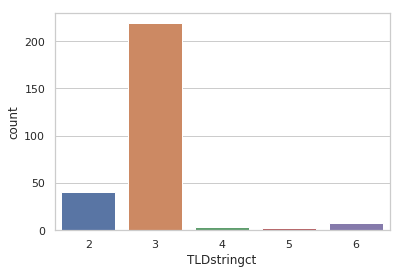

In [49]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 07 11:00:00 2019

@author: Geoffrey Duncan Opiyo

Data Exploration
"""
#Importing the libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x="TLDstringct", data=dataset_RF)
plt.show()

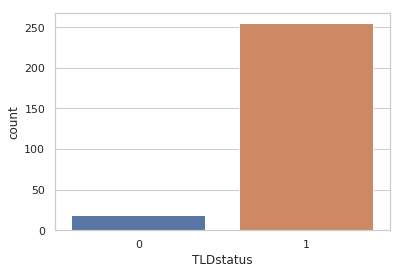

In [50]:
sns.countplot(x="TLDstatus", data=dataset_RF)
plt.show()


In [22]:
# Write OUT prediction result to a CSV file pred_1.csv
pred = pd.DataFrame()
pred['Id'] = np.arange(X_test.shape[0])
pred['Prediction'] = np.zeros(X_test.shape[0],dtype = np.int)
pred.to_csv('pred_1.csv',index=False)
pred.tail(10)

,Id,Prediction
59,59,0
60,60,0
61,61,0
62,62,0
63,63,0
64,64,0
65,65,0
66,66,0
67,67,0
68,68,0


Confusion matrix, without normalization
[[1840  293]
 [ 477  827]]


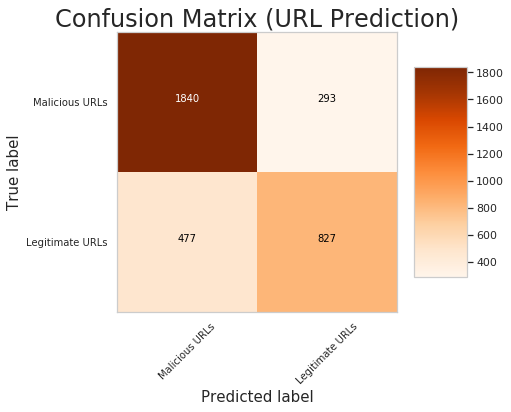

In [34]:
#Confusion Matrix


from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
   
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (7, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 10)
    plt.yticks(tick_marks, classes, size = 10)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 10,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 15)
    plt.xlabel('Predicted label', size = 15)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Malicious URLs', 'Legitimate URLs'],
                      title = 'Confusion Matrix (URL Prediction)')

plt.savefig('cm.png')

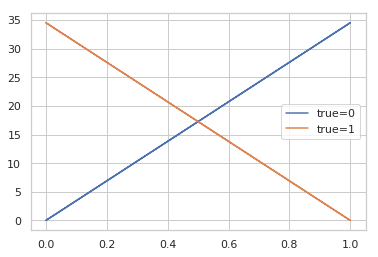

In [35]:
# plot impact of logloss for single forecasts

from sklearn.metrics import log_loss
from matplotlib import pyplot
from numpy import array
# predictions as 0 to 1 in 0.01 increments
y_pred = classifier.predict(X_test)
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in y_pred]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in y_pred]
# plot input to loss
pyplot.plot(y_pred, losses_0, label='true=0')
pyplot.plot(y_pred, losses_1, label='true=1')
pyplot.legend()
pyplot.show()